# Classifying Cats and Dogs

## Importing the *Libraries*

In [1]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.layers import  BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau



from tensorflow.keras.preprocessing import image
import numpy as np


## Extracting Data for use case

In [2]:
## Extracting from the web link
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-08-07 19:07:09--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-08-07 19:07:09--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d782d46175b170ce3866602dc.dl.dropboxusercontent.com/cd/0/inline/BTyf9635VjQ1eqzxXNYRxT69Gfz-FoSEKCGHqSh-c30Q5eOC7z4OmnCuH13MTJNTpuWhkLN8ovnhmbtGtbJHjjNLhtTrBBvum2g-9EyEjoGYNQ1vKnAt8YIvO4GlO7nKT0hma8EI5Wb_h0Zpw391ei3h/file# [following]
--2021-08-07 19:07:10--  https://uc2d782d46175b170ce3866602dc.dl.dropboxusercontent.com/cd/0/inline/BTyf9635VjQ1eqzxXNYRxT69Gfz-FoSEKCGHqSh-c30Q5eOC7z4OmnCuH13MTJNTpuWhkLN8ovnhmb

In [3]:
## Unzipping the data set.

!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

### Verifying the Data

Populating the interactive namespace from numpy and matplotlib


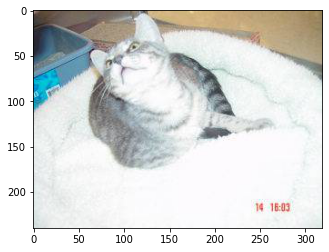

In [4]:
%pylab inline
img=mpimg.imread('/content/test_set/test_set/cats/cat.4781.jpg')
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


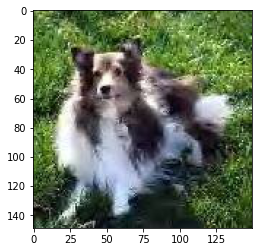

In [5]:
%pylab inline
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4975.jpg')
imgplot = plt.imshow(img)
plt.show()

### Parameters for Run

In [6]:
img_width, img_height = 150,150  #width and height of the images
train_dir = r"/content/training_set/training_set"
validation_dir=r"/content/test_set/test_set"
train_sample_size =100
validation_sample_size =100
epochs =20
batch_size= 20

In [7]:
## Checking Shape of sample:

import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

### Generating extra data set

In [8]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)

test_datagen=ImageDataGenerator (rescale=1. /255)

train_generator =train_datagen.flow_from_directory(train_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

validation_generator =test_datagen.flow_from_directory(validation_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Function to get model stats

In [9]:
def model_stats(training_model):
  print(training_model.history.keys())
  # summarize training for accuracy
  plt.plot(training_model.history['accuracy'])
  plt.plot(training_model.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize traning for loss
  plt.plot(training_model.history['loss'])
  plt.plot(training_model.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

## Building Diffrent Models

### Building Basic Model -> Model_0

In [10]:
model_0 = Sequential()
model_0.add(Conv2D(64,(3,3),input_shape=input_shape, activation='relu')) #64 neurons with 3*3 filter and applying 'relu' activation
model_0.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data
model_0.add(Flatten())#Converts multi dimensional array to 1D channel
model_0.add(Dense(64, activation='relu')) #64 neurons with 3*3 filter and applying 'relu' activation
model_0.add(Dense(1, activation='sigmoid')) #output layer and applying 'sigmoid' activation

In [11]:
model_0.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_0 = model_0.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size)

Epoch 1/20
100/100 [==============================] - 51s 196ms/step - loss: 1.5998 - accuracy: 0.5525 - val_loss: 0.7106 - val_accuracy: 0.5235
Epoch 2/20
100/100 [==============================] - 21s 208ms/step - loss: 0.6736 - accuracy: 0.6280 - val_loss: 0.6051 - val_accuracy: 0.6730
Epoch 3/20
100/100 [==============================] - 19s 194ms/step - loss: 0.6352 - accuracy: 0.6479 - val_loss: 0.6214 - val_accuracy: 0.6540
Epoch 4/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6293 - accuracy: 0.6640 - val_loss: 0.6978 - val_accuracy: 0.6450
Epoch 5/20
100/100 [==============================] - 21s 209ms/step - loss: 0.6309 - accuracy: 0.6785 - val_loss: 0.7695 - val_accuracy: 0.5970
Epoch 6/20
100/100 [==============================] - 20s 196ms/step - loss: 0.6002 - accuracy: 0.6860 - val_loss: 0.6057 - val_accuracy: 0.6610
Epoch 7/20
100/100 [==============================] - 19s 194ms/step - loss: 0.6171 - accuracy: 0.6715 - val_loss: 0.5689 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


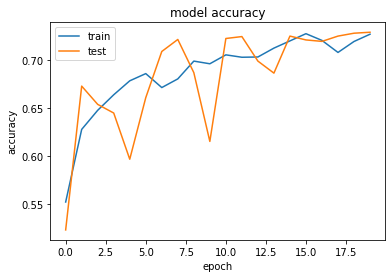

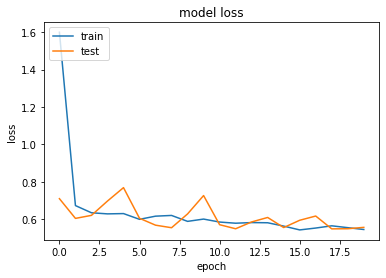

In [13]:
## Gathering model stats
model_stats(train_0)

#### Predicting the output

[[1.]]
Prediction:  Dog


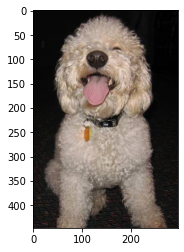

In [14]:

img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_0.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

[[0.03190022]]
Prediction:  Cat


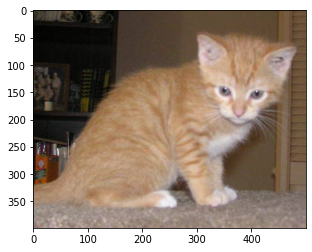

In [15]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_0.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### Model_1 : Adding Batch Normalisation and more Convolution layers

In [16]:
from keras.layers import  BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
filter = (3,3)
poolsize = (2,2)

callbacks = [earlystop, learning_rate_reduction]

model_1 = Sequential()
model_1.add(Conv2D(32,filter,input_shape=input_shape)) 
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=poolsize))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, filter, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=poolsize))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, filter, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=poolsize))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='softmax')) 



In [17]:
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)       

In [18]:
train_1 = model_1.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 22s 203ms/step - loss: 1.1248 - accuracy: 0.5018 - val_loss: 2.2461 - val_accuracy: 0.5010
Epoch 2/20
100/100 [==============================] - 22s 216ms/step - loss: 0.8352 - accuracy: 0.4975 - val_loss: 0.9116 - val_accuracy: 0.4985
Epoch 3/20
100/100 [==============================] - 21s 212ms/step - loss: 0.7760 - accuracy: 0.4920 - val_loss: 0.7454 - val_accuracy: 0.5005

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
100/100 [==============================] - 20s 201ms/step - loss: 0.6575 - accuracy: 0.4945 - val_loss: 0.6406 - val_accuracy: 0.5010
Epoch 5/20
100/100 [==============================] - 20s 205ms/step - loss: 0.6428 - accuracy: 0.4835 - val_loss: 0.7959 - val_accuracy: 0.5005

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/20
100/100 [==============================] - 20s 203ms/step - loss: 0.5988 - accuracy: 0.4960 - val_loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


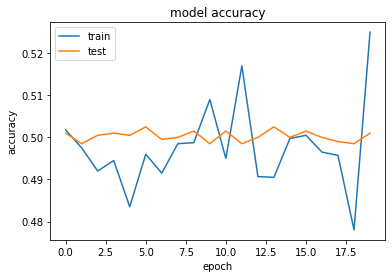

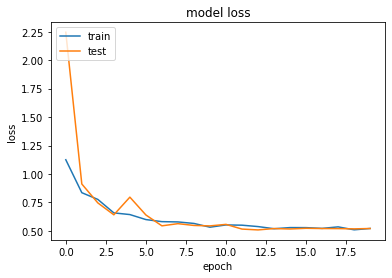

In [19]:
## Print model stats
model_stats(train_1)

[[1.]]
Prediction:  Dog


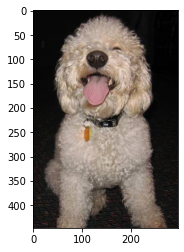

In [20]:
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

[[1.]]
Prediction:  Dog


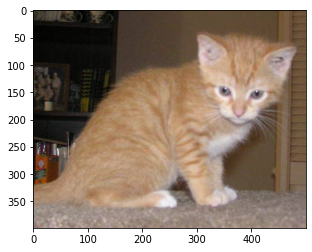

In [22]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

### Model_2 : Adding more Convolution layers and using Adam as an optimizer

In [23]:
model_2 = Sequential()
model_2.add(Conv2D(32,filter,input_shape=input_shape)) 
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=poolsize))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, filter, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=poolsize))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, filter, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=poolsize))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(256, filter, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=poolsize))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='softmax')) 

In [24]:
model_2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)       

In [25]:
train_2 = model_2.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 22s 210ms/step - loss: 1.0311 - accuracy: 0.5005 - val_loss: 0.7214 - val_accuracy: 0.5010
Epoch 2/20
100/100 [==============================] - 20s 202ms/step - loss: 0.8050 - accuracy: 0.4907 - val_loss: 1.3003 - val_accuracy: 0.4990
Epoch 3/20
100/100 [==============================] - 22s 217ms/step - loss: 0.7403 - accuracy: 0.5110 - val_loss: 1.3522 - val_accuracy: 0.4995

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
100/100 [==============================] - 20s 204ms/step - loss: 0.6816 - accuracy: 0.5025 - val_loss: 0.9588 - val_accuracy: 0.5015
Epoch 5/20
100/100 [==============================] - 21s 208ms/step - loss: 0.6332 - accuracy: 0.5010 - val_loss: 0.8199 - val_accuracy: 0.4985
Epoch 6/20
100/100 [==============================] - 22s 223ms/step - loss: 0.6377 - accuracy: 0.5068 - val_loss: 0.8296 - val_accuracy: 0.5000

Epoch 00006: ReduceLROnPlateau reducing learning

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


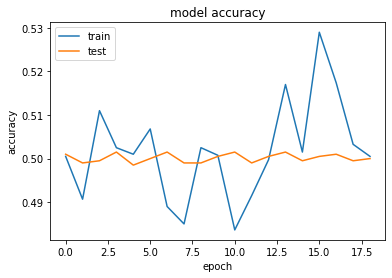

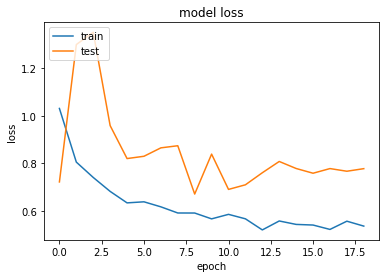

In [26]:
## Print model stats
model_stats(train_2)

[[1.]]
Prediction:  Dog


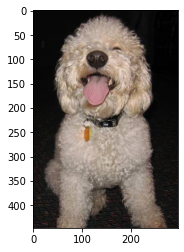

In [27]:
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

[[1.]]
Prediction:  Dog


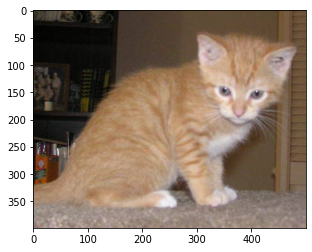

In [28]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

### Model_3 : Modifying the Drop-out layer

In [29]:
model_3 = Sequential()
model_3.add(Conv2D(32,filter,input_shape=input_shape)) 
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=poolsize))
model_3.add(Dropout(0.4))

model_3.add(Conv2D(64, filter, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=poolsize))
model_3.add(Dropout(0.4))

model_3.add(Conv2D(128, filter, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=poolsize))
model_3.add(Dropout(0.4))

model_3.add(Conv2D(256, filter, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=poolsize))
model_3.add(Dropout(0.4))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation='softmax')) 

In [31]:
model_3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)       

In [32]:
train_3 = model_3.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 23s 219ms/step - loss: 0.9333 - accuracy: 0.5010 - val_loss: 4.0743 - val_accuracy: 0.5015
Epoch 2/20
100/100 [==============================] - 20s 199ms/step - loss: 0.7691 - accuracy: 0.4866 - val_loss: 5.2633 - val_accuracy: 0.4995
Epoch 3/20
100/100 [==============================] - 21s 213ms/step - loss: 0.7230 - accuracy: 0.4927 - val_loss: 4.9692 - val_accuracy: 0.5025
Epoch 4/20
100/100 [==============================] - 20s 199ms/step - loss: 0.7290 - accuracy: 0.4980 - val_loss: 2.1600 - val_accuracy: 0.5015
Epoch 5/20
100/100 [==============================] - 21s 207ms/step - loss: 0.6896 - accuracy: 0.5038 - val_loss: 0.7672 - val_accuracy: 0.5015

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
100/100 [==============================] - 21s 209ms/step - loss: 0.6445 - accuracy: 0.5055 - val_loss: 0.6682 - val_accuracy: 0.5000
Epoch 7/20
100/100 [=============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


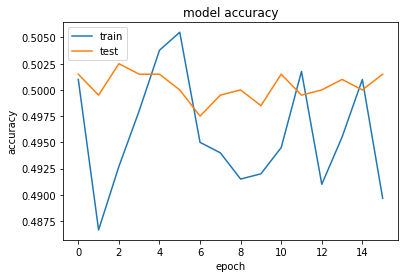

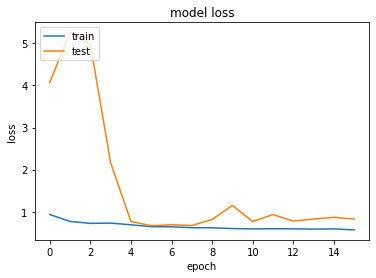

In [33]:
## Print model stats
model_stats(train_3)

### Model_4 : Modifying the other parameters for model tuning

In [41]:
earlystop = EarlyStopping(patience=15)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.005)
train_sample_size =100
validation_sample_size =50
epochs =50
batch_size= 30

In [42]:
model_4 = Sequential()
model_4.add(Conv2D(32,filter,input_shape=input_shape)) 
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=poolsize))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(64, filter, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=poolsize))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(128, filter, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=poolsize))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(256, filter, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=poolsize))
model_4.add(Dropout(0.3))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(1, activation='softmax')) 

In [43]:
model_4.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
module_wrapper_19 (ModuleWra (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
module_wrapper_20 (ModuleWra (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)       

In [39]:
train_4 = model_4.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size,callbacks=callbacks,
                      use_multiprocessing=True)

Epoch 1/50
100/100 [==============================] - 21s 205ms/step - loss: 0.9387 - accuracy: 0.5010 - val_loss: 1.0121 - val_accuracy: 0.5050
Epoch 2/50
100/100 [==============================] - 20s 202ms/step - loss: 0.7649 - accuracy: 0.4856 - val_loss: 1.0622 - val_accuracy: 0.5040
Epoch 3/50
100/100 [==============================] - 20s 197ms/step - loss: 0.7117 - accuracy: 0.5030 - val_loss: 1.6080 - val_accuracy: 0.4840

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/50
100/100 [==============================] - 20s 194ms/step - loss: 0.6756 - accuracy: 0.5020 - val_loss: 0.9394 - val_accuracy: 0.4980
Epoch 5/50
100/100 [==============================] - 21s 209ms/step - loss: 0.6133 - accuracy: 0.4992 - val_loss: 0.7424 - val_accuracy: 0.5150
Epoch 6/50
100/100 [==============================] - 21s 212ms/step - loss: 0.6428 - accuracy: 0.4995 - val_loss: 0.7046 - val_accuracy: 0.5270
Epoch 7/50
100/100 [=============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


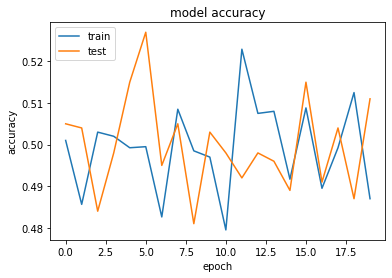

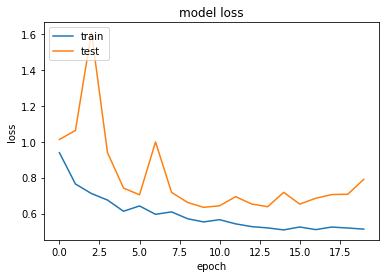

In [40]:
## Print model stats
model_stats(train_4)

### Model_5: Changing the model fit parameters

In [44]:
earlystop = EarlyStopping(patience=15)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, ## increased the patience 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.005)
train_sample_size = 500 ## increased train sample size
validation_sample_size = 300  ## inncreased validation sample size
epochs =50
batch_size= 30

In [45]:
train_5 = model_4.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size,callbacks=callbacks,
                      use_multiprocessing=True)

Epoch 1/50
500/500 [==============================] - 100s 198ms/step - loss: 0.7757 - accuracy: 0.5009 - val_loss: 1.1682 - val_accuracy: 0.5003
Epoch 2/50
500/500 [==============================] - 100s 199ms/step - loss: 0.6052 - accuracy: 0.4981 - val_loss: 0.9365 - val_accuracy: 0.4993
Epoch 3/50
500/500 [==============================] - 100s 200ms/step - loss: 0.5573 - accuracy: 0.4980 - val_loss: 0.6276 - val_accuracy: 0.4990

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/50
500/500 [==============================] - 101s 202ms/step - loss: 0.4955 - accuracy: 0.4975 - val_loss: 0.5839 - val_accuracy: 0.4997
Epoch 5/50
500/500 [==============================] - 100s 199ms/step - loss: 0.4742 - accuracy: 0.5001 - val_loss: 0.5992 - val_accuracy: 0.4993

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/50
500/500 [==============================] - 99s 198ms/step - loss: 0.4246 - accuracy: 0.5004 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


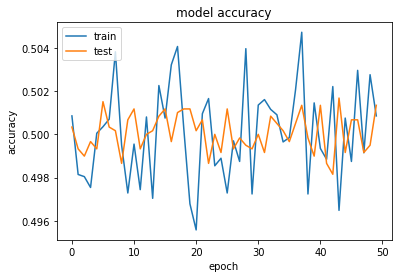

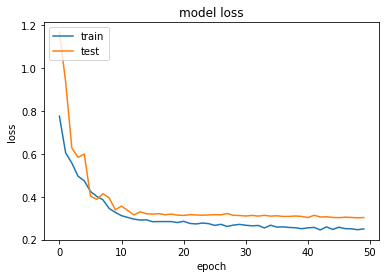

In [46]:
## Print model stats
model_stats(train_5)

### Model_6: Changing Model Layers

In [49]:
model_6 = Sequential()
model_6.add(Conv2D(32,filter,input_shape=input_shape)) 
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D(pool_size=poolsize))
model_6.add(Dropout(0.3))

model_6.add(Conv2D(256, filter, activation='relu'))
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D(pool_size=poolsize))
model_6.add(Dropout(0.3))

model_6.add(Conv2D(512, filter, activation='relu'))
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D(pool_size=poolsize))
model_6.add(Dropout(0.3))

model_6.add(Conv2D(512, filter, activation='relu'))
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D(pool_size=poolsize))
model_6.add(Dropout(0.3))

model_6.add(Flatten())
model_6.add(Dense(256, activation='relu'))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.5))
model_6.add(Dense(1, activation='softmax')) 

In [50]:
earlystop = EarlyStopping(patience=15)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2,  
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00005)
train_sample_size = 500 ## increased train sample size
validation_sample_size = 300  ## inncreased validation sample size
epochs = 20
batch_size= 30

In [52]:
model_6.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
module_wrapper_29 (ModuleWra (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 256)       73984     
_________________________________________________________________
module_wrapper_30 (ModuleWra (None, 72, 72, 256)       1024      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 256)      

In [53]:
train_6 = model_6.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size,callbacks=callbacks,
                      use_multiprocessing=True, workers = 4)

Epoch 1/20
500/500 [==============================] - 92s 177ms/step - loss: 0.7488 - accuracy: 0.5015 - val_loss: 0.6546 - val_accuracy: 0.4997
Epoch 2/20
500/500 [==============================] - 91s 180ms/step - loss: 0.5826 - accuracy: 0.4992 - val_loss: 0.5692 - val_accuracy: 0.4997
Epoch 3/20
500/500 [==============================] - 89s 177ms/step - loss: 0.5061 - accuracy: 0.5031 - val_loss: 0.4265 - val_accuracy: 0.5008
Epoch 4/20
500/500 [==============================] - 90s 179ms/step - loss: 0.4474 - accuracy: 0.4983 - val_loss: 0.4545 - val_accuracy: 0.5023
Epoch 5/20
500/500 [==============================] - 90s 179ms/step - loss: 0.4069 - accuracy: 0.5005 - val_loss: 0.5057 - val_accuracy: 0.5012
Epoch 6/20
500/500 [==============================] - 91s 180ms/step - loss: 0.3664 - accuracy: 0.5024 - val_loss: 0.3785 - val_accuracy: 0.4998

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/20
500/500 [=============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


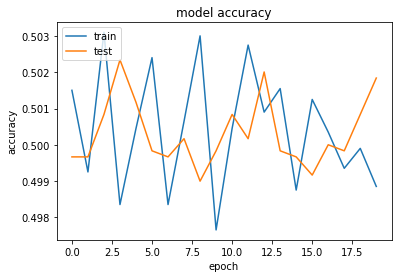

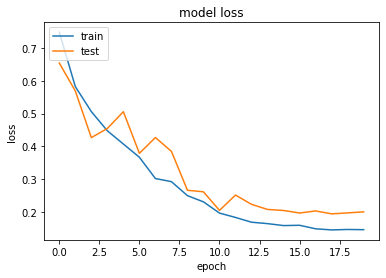

In [54]:
## Print model stats
model_stats(train_6)

[[1.]]
Prediction:  Dog


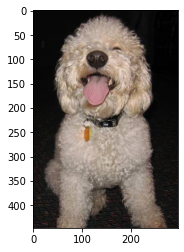

In [55]:
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_6.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

[[1.]]
Prediction:  Dog


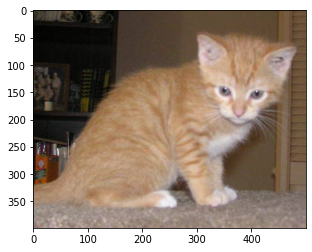

In [56]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_6.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

### Model_7: Changing Model Layers - Adding more Convulution layers

In [14]:
earlystop = EarlyStopping(patience=15)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00005)
train_sample_size = 1000 ## increased train sample size
validation_sample_size = 600  ## inncreased validation sample size
epochs = 30
batch_size= 50

filter = (3,3)
poolsize = (2,2)

callbacks = [earlystop, learning_rate_reduction]


In [22]:
model_7 = Sequential()
model_7.add(Conv2D(32,filter,input_shape=input_shape)) 
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=poolsize))
model_7.add(Dropout(0.3))

model_7.add(Conv2D(256, filter, activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=poolsize))
model_7.add(Dropout(0.3))

model_7.add(Conv2D(512, filter, activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=poolsize))
model_7.add(Dropout(0.3))

model_7.add(Conv2D(1024, filter, activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=poolsize))
model_7.add(Dropout(0.4))

model_7.add(Conv2D(2048, filter, activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=poolsize))
model_7.add(Dropout(0.4))

model_7.add(Flatten())
model_7.add(Dense(512, activation='relu'))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))

model_7.add(Dense(1, activation='softmax'))

In [23]:
model_7.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_7.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
module_wrapper_30 (ModuleWra (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 72, 72, 256)       73984     
_________________________________________________________________
module_wrapper_31 (ModuleWra (None, 72, 72, 256)       1024      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 256)      

In [24]:
train_7 = model_7.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size,callbacks=callbacks,
                      use_multiprocessing=True, workers = 4)

Epoch 1/30
1000/1000 [==============================] - 221s 186ms/step - loss: 0.7180 - accuracy: 0.5003 - val_loss: 0.6113 - val_accuracy: 0.5002
Epoch 2/30
1000/1000 [==============================] - 186s 186ms/step - loss: 0.5318 - accuracy: 0.4994 - val_loss: 0.5295 - val_accuracy: 0.4992
Epoch 3/30
1000/1000 [==============================] - 192s 191ms/step - loss: 0.4338 - accuracy: 0.5003 - val_loss: 0.3568 - val_accuracy: 0.5003

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/30
1000/1000 [==============================] - 187s 186ms/step - loss: 0.3222 - accuracy: 0.5007 - val_loss: 0.2645 - val_accuracy: 0.4992
Epoch 5/30
1000/1000 [==============================] - 186s 186ms/step - loss: 0.2829 - accuracy: 0.4988 - val_loss: 0.2601 - val_accuracy: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/30
1000/1000 [==============================] - 188s 187ms/step - loss: 0.2219 - accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


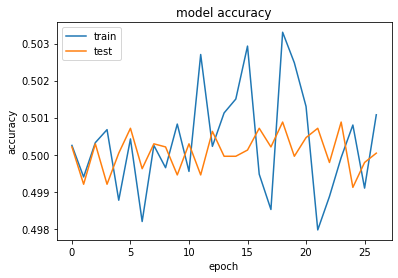

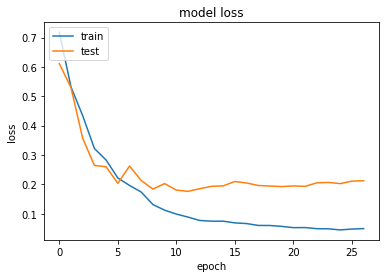

In [25]:
## Print model stats
model_stats(train_7)

[[1.]]
Prediction:  Dog


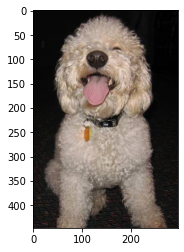

In [26]:
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_7.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

[[1.]]
Prediction:  Dog


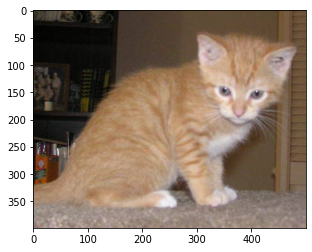

In [27]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_7.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

### Model_8: Changing Model Layers - Running model with RMSProp

In [10]:
earlystop = EarlyStopping(patience=15)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2,
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000005)
train_sample_size = 1000 ## increased train sample size
validation_sample_size = 600  ## inncreased validation sample size
epochs = 30
batch_size= 50

filter = (3,3)
poolsize = (2,2)

callbacks = [earlystop, learning_rate_reduction]

In [11]:
model_8 = Sequential()
model_8.add(Conv2D(32,filter,input_shape=input_shape)) 
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D(pool_size=poolsize))
model_8.add(Dropout(0.3))

model_8.add(Conv2D(256, filter, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D(pool_size=poolsize))
model_8.add(Dropout(0.3))

model_8.add(Conv2D(512, filter, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D(pool_size=poolsize))
model_8.add(Dropout(0.3))

model_8.add(Conv2D(1024, filter, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D(pool_size=poolsize))
model_8.add(Dropout(0.4))

model_8.add(Conv2D(2048, filter, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D(pool_size=poolsize))
model_8.add(Dropout(0.4))

model_8.add(Flatten())
model_8.add(Dense(512, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(Dropout(0.5))

model_8.add(Dense(1, activation='softmax'))

In [12]:
model_8.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 256)       73984     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 72, 72, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 256)       0

In [13]:
train_8 = model_8.fit(train_generator,
                   steps_per_epoch=train_sample_size,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=validation_sample_size,callbacks=callbacks,
                      use_multiprocessing=True, workers = 4)

Epoch 1/30
1000/1000 [==============================] - 221s 185ms/step - loss: 0.7573 - accuracy: 0.4973 - val_loss: 0.5944 - val_accuracy: 0.4998
Epoch 2/30
1000/1000 [==============================] - 187s 187ms/step - loss: 0.5024 - accuracy: 0.5010 - val_loss: 0.4127 - val_accuracy: 0.4997
Epoch 3/30
1000/1000 [==============================] - 188s 187ms/step - loss: 0.3860 - accuracy: 0.5003 - val_loss: 0.5133 - val_accuracy: 0.4998

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/30
1000/1000 [==============================] - 188s 187ms/step - loss: 0.2865 - accuracy: 0.4992 - val_loss: 0.3326 - val_accuracy: 0.5003
Epoch 5/30
1000/1000 [==============================] - 194s 193ms/step - loss: 0.2429 - accuracy: 0.4985 - val_loss: 0.3180 - val_accuracy: 0.4997
Epoch 6/30
1000/1000 [==============================] - 189s 188ms/step - loss: 0.2274 - accuracy: 0.4995 - val_loss: 0.2298 - val_accuracy: 0.4997

Epoch 00006: ReduceLROnPlateau

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


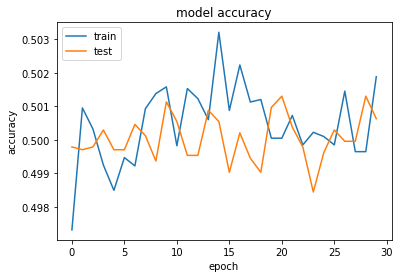

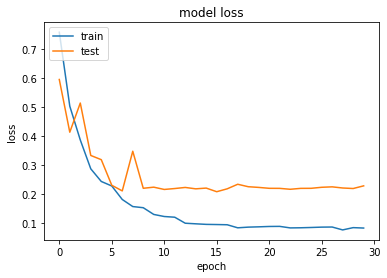

In [14]:
## Print model stats
model_stats(train_8)

[[1.]]
Prediction:  Dog


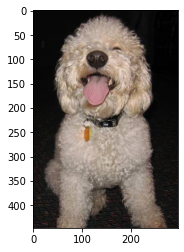

In [15]:
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_8.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

[[1.]]
Prediction:  Dog


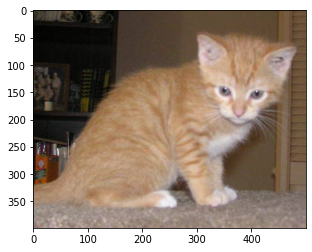

In [16]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(img_width, img_height))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_8.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

## Conclusion

1. Model_1 is the best model where optimiser is RMSProp because loss > val_loss so the model is not overfitting and it has highest accurancy of 0.52
2. Model_6 is the second best model when we added more number of neurons which helping in checking model overfitting
3. After creating different model by changing various paramters in model, the model accuracy ranges between 0.48 to 0.52